# <center>Water Potability Prediction 💧</center>

# Importing Essential Libraries, Metrics, Tools and Models

In [ ]:
#Data Handling & Data Viz.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")


#Data Partition and Training
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


#ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Loading the Data

In [ ]:
df = pd.read_csv("/content/water_potability.csv")

# Exploratory Data Analysis

***Taking a look at the first 5 rows of the dataset.***

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


***Checking the dimensions of the dataset.***

In [ ]:
df.shape

(3276, 10)

***Learning the dtypes of columns' and how many non-null values there are in those columns.***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


***Getting the statistical summary of dataset.***

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


# Handling Missing Values and Duplicates

***As we can see, there are missing values in columns "ph", "Sulfate" and "Trihalomethanes".***

In [ ]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
def isnull_prop(df):
    total_rows = df.shape[0]
    missing_val_dict = {}
    for col in df.columns:
        missing_val_dict[col] = [df[col].isnull().sum(), (df[col].isnull().sum() / total_rows)]
    return missing_val_dict

# Apply the missing value method
null_dict = isnull_prop(df)
print(null_dict.items())

dict_items([('ph', [491, 0.14987789987789987]), ('Hardness', [0, 0.0]), ('Solids', [0, 0.0]), ('Chloramines', [0, 0.0]), ('Sulfate', [781, 0.23840048840048841]), ('Conductivity', [0, 0.0]), ('Organic_carbon', [0, 0.0]), ('Trihalomethanes', [162, 0.04945054945054945]), ('Turbidity', [0, 0.0]), ('Potability', [0, 0.0])])


In [ ]:
# Create a dataframe of the missing value information
df_missing = pd.DataFrame.from_dict(null_dict, orient="index", columns=['missing', 'miss_percent'])
df_missing

,missing,miss_percent
ph,491,0.149878
Hardness,0,0.000000
Solids,0,0.000000
Chloramines,0,0.000000
Sulfate,781,0.238400
Conductivity,0,0.000000
Organic_carbon,0,0.000000
Trihalomethanes,162,0.049451
Turbidity,0,0.000000
Potability,0,0.000000


***Visualizing the Nullity Matrix(missing values).***

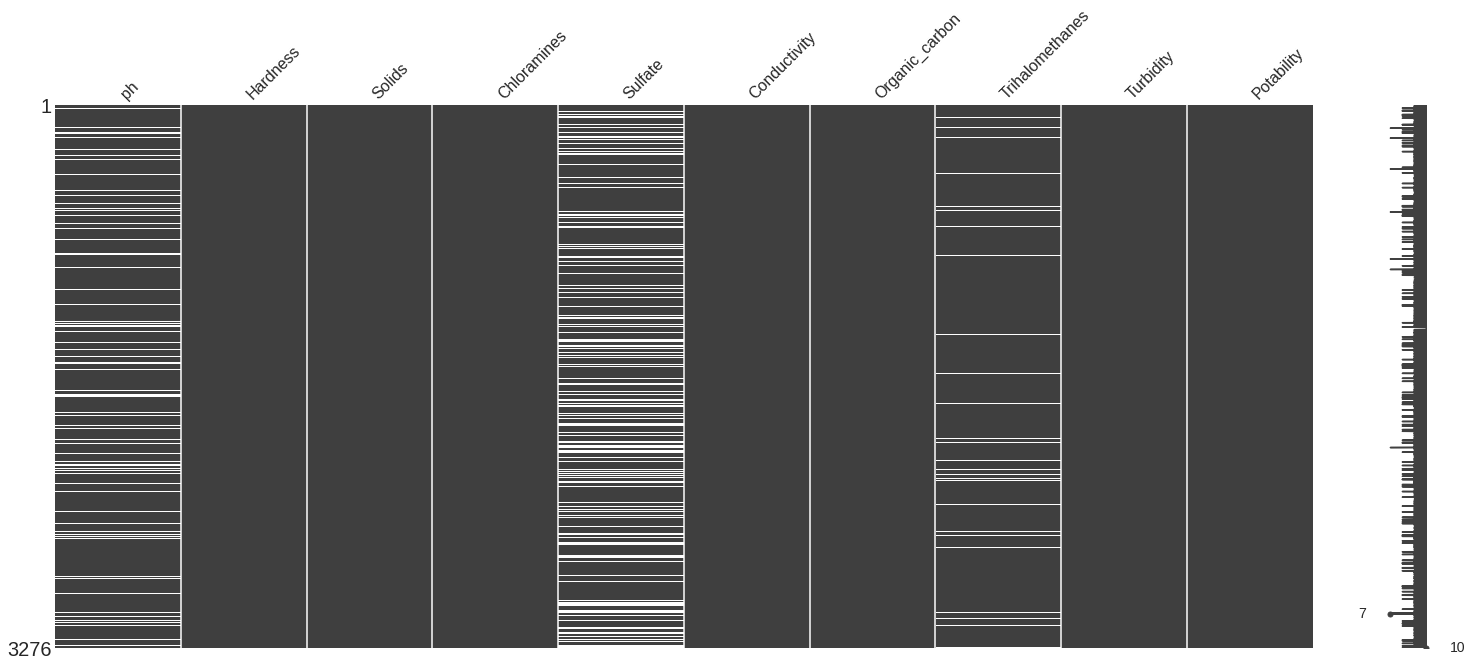

In [ ]:
msno.matrix(df)

***Imputing the missing values with the median value of that particular column by "Potability". It means that if there is missing value in a row and that row has the "Potability" value of 1, it is imputed with meadian value of the group in that particular column in which all the rows have the "Potability" value of 1. If that row has the "Potability" value of 0, then it is imputed with median value of the group in that particular column in which all the rows have the "Potability" value of 0.***

In [ ]:
df['ph'] = df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('median'))
df['Sulfate'] = df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('median'))
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('median'))

In [ ]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

***It seems that there is no duplicate in the dataset.***

In [ ]:
df.duplicated().sum()

0

# Data Visualization

<h3>Plotting the Distribution of Each Variable</h3>

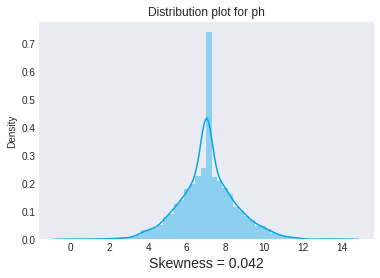

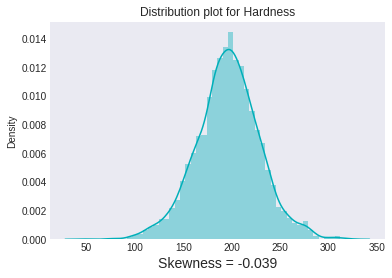

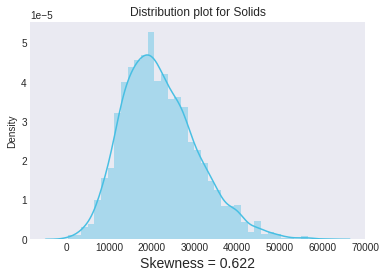

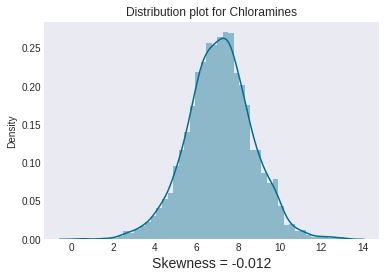

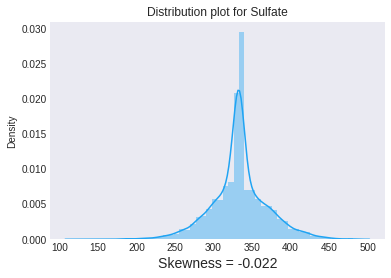

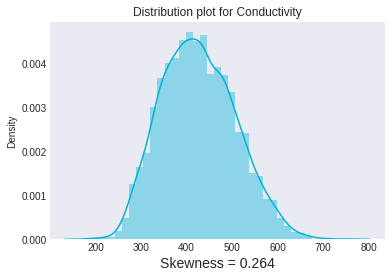

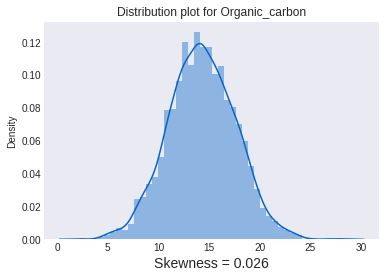

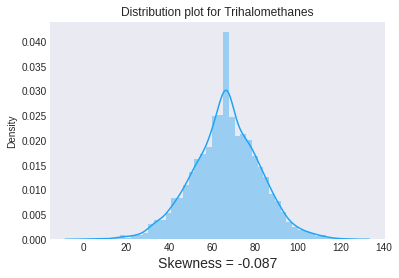

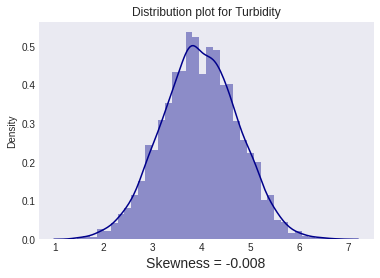

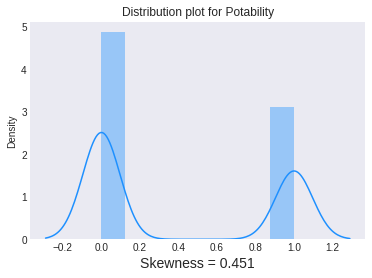

In [ ]:

plt.style.use('seaborn-dark')
colors=['#00a8e8', '#00afb9',  '#48bfe3', '#006e90', '#20a4f3', '#00b4d8', '#0466c8', '#20a4f3', '#00008B','#1E90FF']
i=0
while i<10:
    for col in df.columns:
        plt.figure(figsize=(6,4))
        sns.distplot(df[col],color=colors[i])
        plt.title(f'Distribution plot for {col}')
        plt.xlabel(f'Skewness = {round(df[col].skew(),3)}',fontsize=14)
        i+=1
        plt.show()

In [ ]:
labels = ['Not Potable','Potable']
values = [df[df["Potability"]==0].shape[0], df[df["Potability"]==1].shape[0]]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5, title="Potability")])
fig.show()

***Visualizing the linear correlations between variables using Heatmap Visualization. The measure used for finding the linear correlation between each variable is Pearson Correlation Coefficient.***

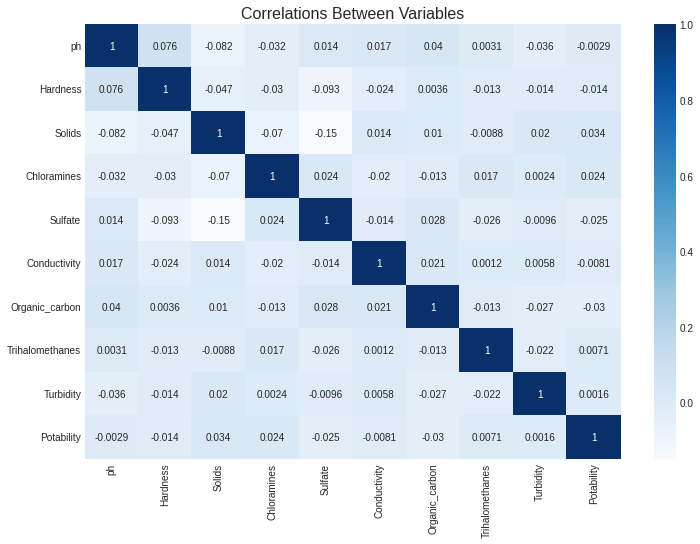

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

# Data Preprocessing

<h3>X, y Split</h3>

In [ ]:
X = df.drop("Potability", axis=1)
y = df["Potability"]

<h3>Data Standardization</h3>

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

<h3>Train-Test Split</h3>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Models

In [ ]:
models = pd.DataFrame(columns=["Model", "Accuracy Score"])

In [ ]:
model_list = [("Logistic Regression", LogisticRegression(random_state=42)), 
              ("Random Forest", RandomForestClassifier(random_state=42)),
              ("LightGBM", LGBMClassifier(random_state=42)),
              ("Support Vector Machines", SVC(random_state=42)),
              ("XGBoost", XGBClassifier(random_state=42)),
              ("Gaussian Naive Bayes", GaussianNB()),
              ("Bernoulli Naive Bayes", BernoulliNB()),
              ("KNN", KNeighborsClassifier(n_neighbors=2)),
              ("Decision Tree", DecisionTreeClassifier(random_state=42)),
              ("Bagging Classifier", BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42))]

In [ ]:
for name, clf in model_list:
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    
    new_row = {"Model": name, "Accuracy Score": score}
    models = models.append(new_row, ignore_index=True)

***It can be seen that the one which is yielding the most accurate result without Hyperparameter Tuning is Random Forest.***

In [ ]:
models.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score
1,Random Forest,0.807927
4,XGBoost,0.803354
9,Bagging Classifier,0.801829
2,LightGBM,0.791159
8,Decision Tree,0.734756
3,Support Vector Machines,0.696646
7,KNN,0.661585
5,Gaussian Naive Bayes,0.629573
0,Logistic Regression,0.628049
6,Bernoulli Naive Bayes,0.628049


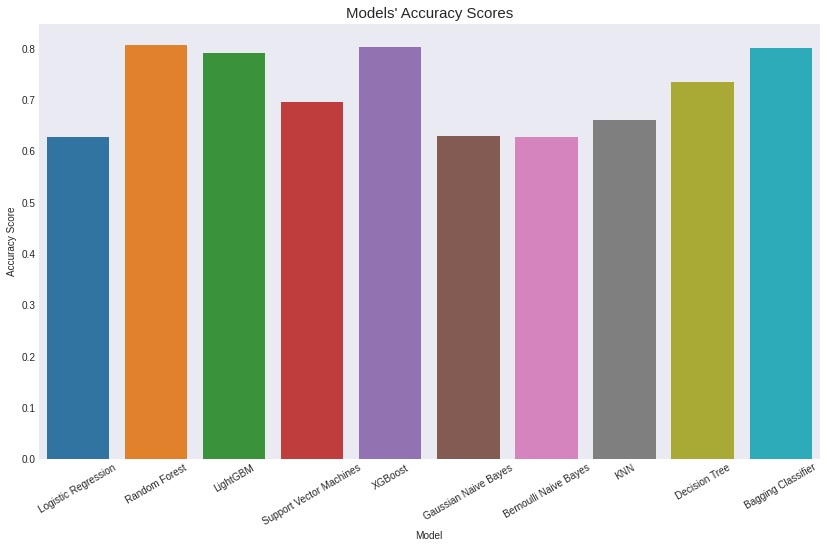

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x=models["Model"], y=models["Accuracy Score"])
plt.title("Models' Accuracy Scores", size=15)
plt.xticks(rotation=30)
plt.show()

# Deep Learning

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD
from tensorflow.keras.layers import Activation
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation

In [ ]:
# x is the set of features for predicting y(potability of water)
x = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [ ]:
st = StandardScaler()
x_columns= x.columns
x[x_columns] = st.fit_transform(x[x_columns])

In [ ]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.026271,0.259195,-0.139471,0.112415,0.967633,1.708954,-1.180651,1.305542,-1.286298
1,-2.284628,-2.036414,-0.385987,-0.307694,-0.004303,2.062575,0.270597,-0.639080,0.684218
2,0.697402,0.847665,-0.240047,1.360594,-0.004303,-0.094032,0.781117,0.000907,-1.167365
3,0.845476,0.547651,0.000493,0.592008,0.645832,-0.778830,1.255134,2.152263,0.848412
4,1.373063,-0.464429,-0.460249,-0.363698,-0.647713,-0.343939,-0.824357,-2.182193,0.138786


In [ ]:
x.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03
mean,1.019060e-16,1.072508e-15,-4.714042e-17,5.111482e-16,1.636024e-15,1.835460e-16,3.372014e-17,-3.894592e-16,5.387089e-16
std,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00
min,-4.812885e+00,-4.530454e+00,-2.474344e+00,-4.277288e+00,-5.659588e+00,-3.028290e+00,-3.653635e+00,-4.164747e+00,-3.225560e+00
25%,-5.418332e-01,-5.937372e-01,-7.239916e-01,-6.285247e-01,-4.551658e-01,-7.482911e-01,-6.709187e-01,-6.188751e-01,-6.755095e-01
50%,-2.627108e-02,1.819424e-02,-1.238999e-01,5.068209e-03,-4.302620e-03,-5.345935e-02,-2.014487e-02,8.651097e-03,-1.507005e-02
75%,5.415501e-01,6.174333e-01,6.066532e-01,6.271058e-01,4.659717e-01,6.878605e-01,6.870970e-01,6.507560e-01,6.837866e-01
max,4.712098e+00,3.855680e+00,4.472689e+00,3.793631e+00,4.080807e+00,4.048144e+00,4.237147e+00,3.652708e+00,3.552921e+00


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape

(2620, 9)

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=9))

model.add(BatchNormalization())

model.add(Dense(32, activation='relu', kernel_initializer='random_normal'))

model.add(Dense(16, activation='relu', kernel_initializer='random_normal'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [ ]:
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                640       
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                      

In [ ]:
history=model.fit(X_train,y_train, batch_size=32, epochs=150, validation_data =(X_test,y_test))

Epoch 1/150
82/82 [==============================] - 1s 6ms/step - loss: 0.6836 - accuracy: 0.5920 - val_loss: 0.6783 - val_accuracy: 0.6280
Epoch 2/150
82/82 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6179 - val_loss: 0.6606 - val_accuracy: 0.6479
Epoch 3/150
82/82 [==============================] - 0s 4ms/step - loss: 0.6235 - accuracy: 0.6626 - val_loss: 0.6385 - val_accuracy: 0.6845
Epoch 4/150
82/82 [==============================] - 0s 4ms/step - loss: 0.6119 - accuracy: 0.6695 - val_loss: 0.6336 - val_accuracy: 0.6738
Epoch 5/150
82/82 [==============================] - 0s 4ms/step - loss: 0.6013 - accuracy: 0.6798 - val_loss: 0.6106 - val_accuracy: 0.6890
Epoch 6/150
82/82 [==============================] - 0s 4ms/step - loss: 0.5966 - accuracy: 0.6836 - val_loss: 0.6064 - val_accuracy: 0.6860
Epoch 7/150
82/82 [==============================] - 0s 4ms/step - loss: 0.5861 - accuracy: 0.6962 - val_loss: 0.6060 - val_accuracy: 0.6860
Epoch 8/150
8

In [ ]:
#Evaluating the model

eval_model=model.evaluate(X_train, y_train)
eval_model

82/82 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.8992


[0.23857414722442627, 0.8992366194725037]

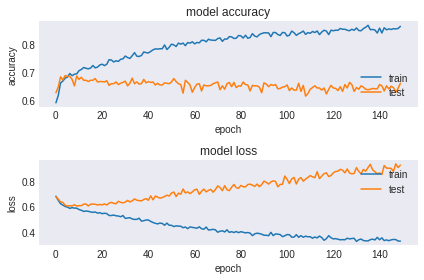

In [ ]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()